<a href="https://colab.research.google.com/github/katiacardoso/AI-Analysis-of-Harry-Potter/blob/run%2C-no-adjustments/AI_Analysis_of_Harry_Potter_Unique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

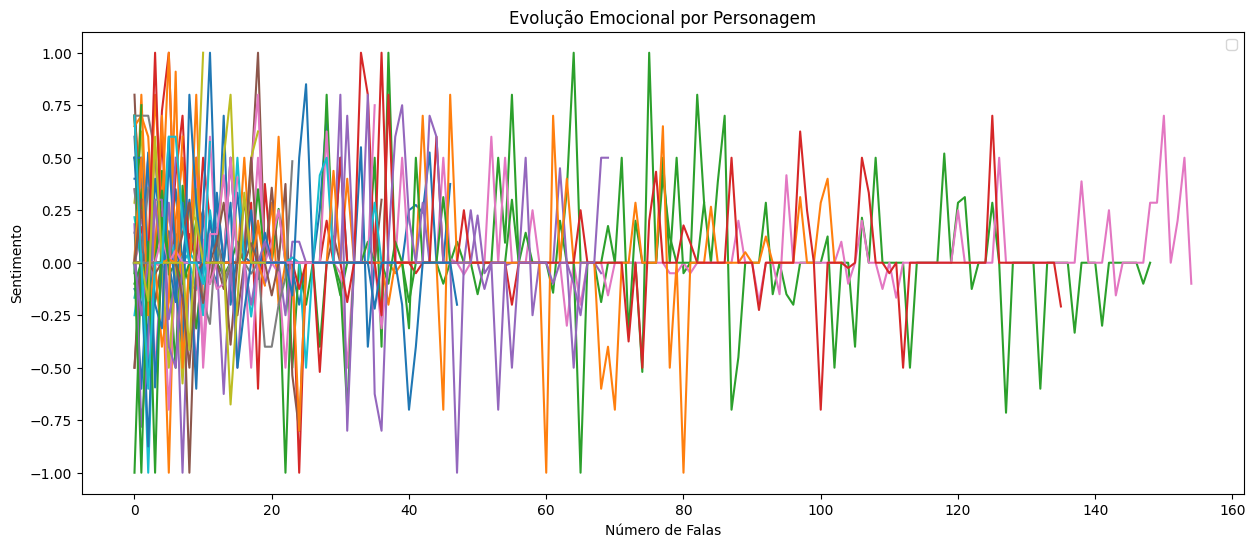

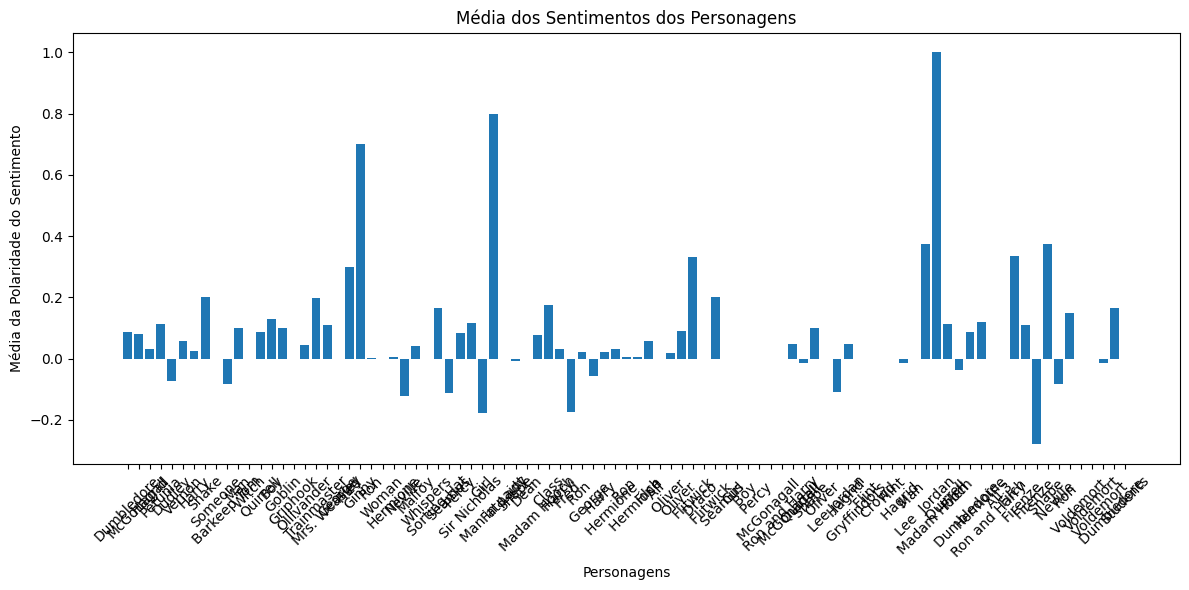

In [ ]:
def plot_bar_chart(sentiments_by_character):
    character_names = list(sentiments_by_character.keys())
    average_sentiments = [sum(sentiments) / len(sentiments) for sentiments in sentiments_by_character.values()]

    plt.figure(figsize=(12, 6))
    plt.bar(character_names, average_sentiments)
    plt.xlabel('Personagens')
    plt.ylabel('Média da Polaridade do Sentimento')
    plt.title('Média dos Sentimentos dos Personagens')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#! pip uninstall nltk
#! pip install -U nltk
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Carregar o arquivo de falas (nome do personagem || fala)
def load_dialogues(file_path):
    dialogues = [] # lista vazia
    with open(file_path, 'r', encoding='utf-8') as file:
      line_count = 0  # Contador de linhas
      for line in file:
        for line in file:  # Lê cada linha do arquivo
            if line_count >= 1588:  # Interrompe o loop após 10 linhas
                break
            #print("Linha lida:", line)  # Imprime a linha para depuração
            #print("n° linha:", line_count)   #botar algo para mostrar a linha apenas quando der erro
            character, sentence = line.strip().split(";")  # Divide a linha em nome do personagem e fala
            #print("Nome do personagem:", character)  # Imprime o nome do personagem para depuração
            #print("Fala:", sentence)  # Imprime a fala para depuração
            dialogues.append((character, sentence))  # Adiciona (nome, fala) à lista de diálogos
            line_count += 1  # Incrementa o contador de linhas

    return dialogues  # Retorna a lista completa de diálogos

# Analisar sentimentos das falas
def analyze_sentiments(dialogues):
    sentiments_by_character = {} #cria um dicionario vazio
    for character, sentence in dialogues:
        if character not in sentiments_by_character:
            sentiments_by_character[character] = []
        blob = TextBlob(sentence)
        sentiment = blob.sentiment.polarity
        sentiments_by_character[character].append(sentiment)
    return sentiments_by_character

# Plotar gráfico da evolução emocional por personagem
def plot_emotional_evolution(sentiments_by_character):
    plt.figure(figsize=(15, 6))
    # Gráfico de linhas
    plt.legend()
    for character, sentiments in sentiments_by_character.items():
        plt.plot(sentiments, label=character)

    plt.xlabel('Número de Falas')
    plt.ylabel('Sentimento')
    plt.title('Evolução Emocional por Personagem')

    plt.show()




def main():
    file_path = '/content/Harry Potter 111.txt'
    dialogues = load_dialogues(file_path)
    sentiments_by_character = analyze_sentiments(dialogues)
    plot_emotional_evolution(sentiments_by_character)
    plot_bar_chart(sentiments_by_character)

    #target_character = ['Harry', 'Hermione', 'Ron']  # Lista dos personagens que você deseja incluir
    #sentiments = analyze_sentiments_for_character(dialogues, target_character)
    #plot_emotional_evolution_for_character(sentiments_by_character, target_character)

if __name__ == "__main__":
    main()